# RX3: 

Everyone who has applied to graduate school knows the power of the GRE. GRE scores can literally determine a person’s future. For this reason, many aspiring graduate students make use of test preparation or coaching classes. In this exercise, we will explore the concepts of statistical hypothesis testing, specificity, and power using examples related to GRE scores and coaching effectiveness.

[![](https://i.imgur.com/YjLCe20.gif)
](https://)

## Hypothesis Testing (i.e., the Original “Standardized Test”)

There is considerable debate regarding the effectiveness of various coaching programs in improving GRE scores. Here, we make use of a recent review on the topic, focusing on the **verbal** (GRE-V) part of the test. Data indicate that changes in the test scores for the general population of students retaking the test without any special coaching are normally distributed with a mean $\mu$ of about 15 points and a standard deviation 	$\sigma$ of about 40 points (This is the mean and standard deviation of the change in the score between tests. The SD of the scores on a single test is higher.) Thus 15 points represent the average improvement due to the learning effect and the natural increase in the verbal ability that occurs over time. If a coaching program does not improve the test scores by more than 15 points on average, then we say that the coaching program has no effect.

------

<span class="girk">**EXERCISE 1:**</span>

The Educational Testing Service (ETS), who administers the GRE, decides to test the
claims of various coaching companies by performing hypothesis tests using a survey of students
who have participated in the various companies’ coaching programs. The organization sets up the
hypotheses as:

$H_{0}$ : $\mu$ $\leq$ 15 (coaching program is ineffective) vs.

$H_{1}$ : $\mu$ > 15 (coaching program is
effective)


They then survey 20 students from each coaching program and calculate the mean change $\bar{X}$ in GRE-V scores and decide to reject $H_{0}$ if $\bar{X}$ > 25. Calculate the Type I error probability
$\alpha$ of this decision rule. (Note that 1 – $\alpha$ is often reported as the **specificity** of the test.)

This can be done manually but it may be easier to use R code to perform the necessary arithmetic. Remember to save important values (like the sample mean or standard deviation) as **variables** so we can use them later. Note: R does not recognise  $\mu$ characters, so name them accordingly, like "mu". 

In [1]:
#Question 1
n=20
mu0=15
se0=40/sqrt(n)
xcrit=25
1-pnorm((xcrit-mu0)/(se0)) #=0.1317762. This is alpha.

[1] 0.1317762

Now we are going to use R to create a plot of the null probability density function (pdf) of the sample mean using the command: 
```
curve(e1, from=v2, to=v3, xlim=c(-20,60))
```

We will replace e1 with the function dnorm(x,v4,v5). v2 and v3 are the extremes of the x range for which the function e1 is plotted.

Set v2 and v3 such that the function is plotted between +/- 4 standard deviations from the mean, assuming that the null hypothesis is true. Note that the function curve() recognizes x exclusively as a variable to be plotted, even if you have not previously created a variable x. 

v4 and v5 respectively is the mean and standard deviation of the random variable under consideration, which in this case is the sample mean, under the assumption that the null hypothesis is true. If you did Exercise 1 correctly, these values should be saved in variables and easy to access. 

<span class="girk">**EXERCISE 2:**</span> Create a plot of the null probability density function (pdf) of the sample mean using the **curve()** command:



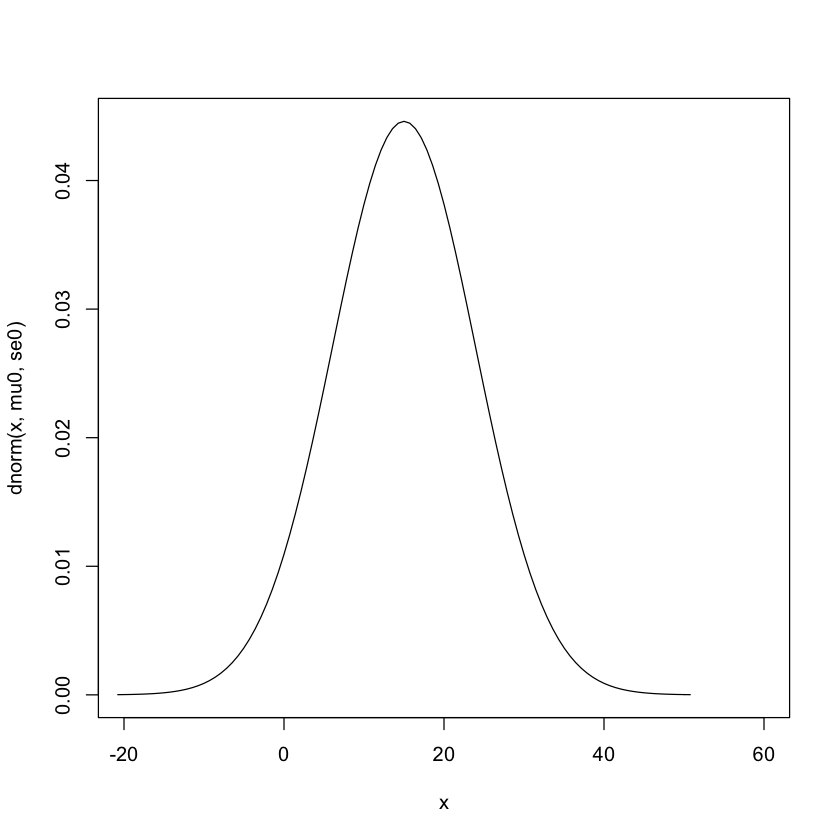

In [2]:
curve(dnorm(x,mu0,se0),from=mu0-4*se0, to=mu0+4*se0, xlim=c(-20,60))

<span class="girk">**EXERCISE 3:**</span> Now we will add some deatils to the plot.In order to add all of these featurs you will need to call curve() to plot your graph first. Use your answer from Exercise 2 as the first command, and then perform the following commands: 

Add a red vertical line at the critical value 25, using the command: 
```
abline(v=25, col="red") 
```

You can shade your Type I error region using the commands (using your own variable names where necessary) :

```
x=seq(from=xcrit, to=mu0+4*se0, by=0.1)
y=dnorm(x, mu0, se0)
polygon(c(25,x), c(0,y), col="grey")
``` 


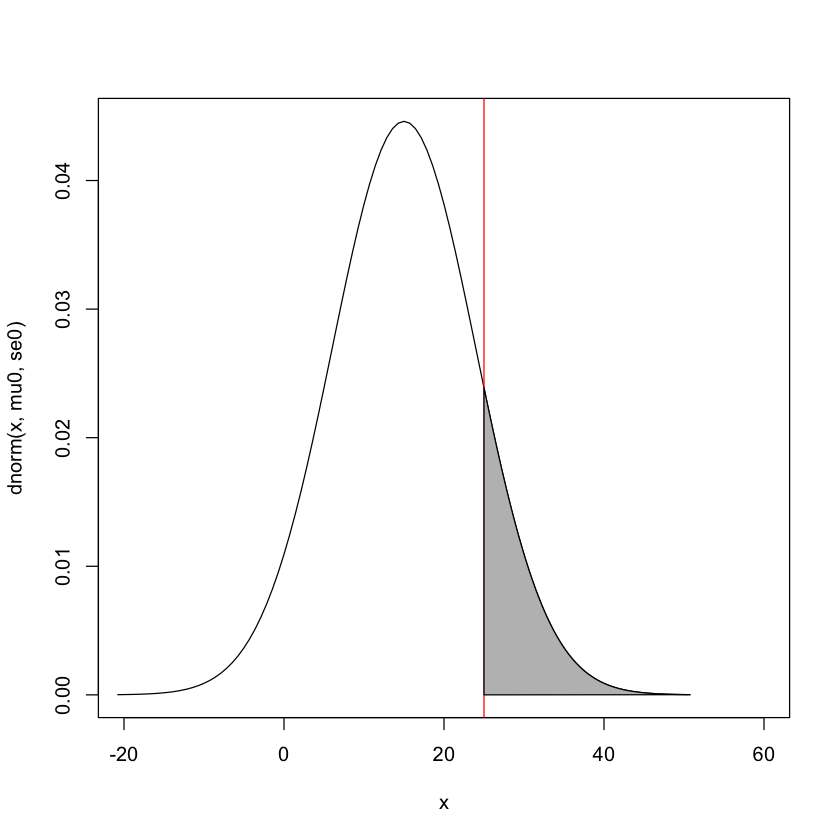

In [3]:
curve(dnorm(x,mu0,se0),from=mu0-4*se0, to=mu0+4*se0, xlim=c(-20,60))
abline(v=25, col="red")
x=seq(from=xcrit, to=mu0+4*se0, by=0.1)
y=dnorm(x, mu0, se0)
polygon(c(25,x), c(0,y), col="grey")

## Determining the Power of a Test

<span class="girk">**EXERCISE 4:**</span> The ACE coaching company prints an advertisement claiming that its actual mean improvement on the GRE-V is **40 points**. Calculate the Type II error probability $\beta$ for the ETS’s testing procedure, given this claim. (Note that 1 – $\beta$ is often reported as the **power** of the test.)

Like in Exercise 1, R can help with computation and let you store important values as variables for later use. 


In [4]:
mu1=40
se1=40/sqrt(n)
pnorm((xcrit-mu1)/(se1)) #=0.04676626. This is beta.

[1] 0.04676626

Now we are going to add a plot (like we did in Exercise 2) of the alternate pdf  using the command 
```
curve(e1, from=v2, to=v3, col="blue") 
```
replacing expression e1 with the function dnorm(x,v4,v5). 

Set v2 and v3 such that the function is plotted between +/- 4 standard deviations from the mean, assuming that the specific alternate hypothesis is true. v4 and v5 respectively is the mean and standard deviation of the random variable under consideration, which in this case is the sample mean, under the assumption that the specific alternate hypothesis is true.

<span class="girk">**EXERCISE 5:**</span> Create a plot of the alternate probability density function (pdf) using the **curve()** command:


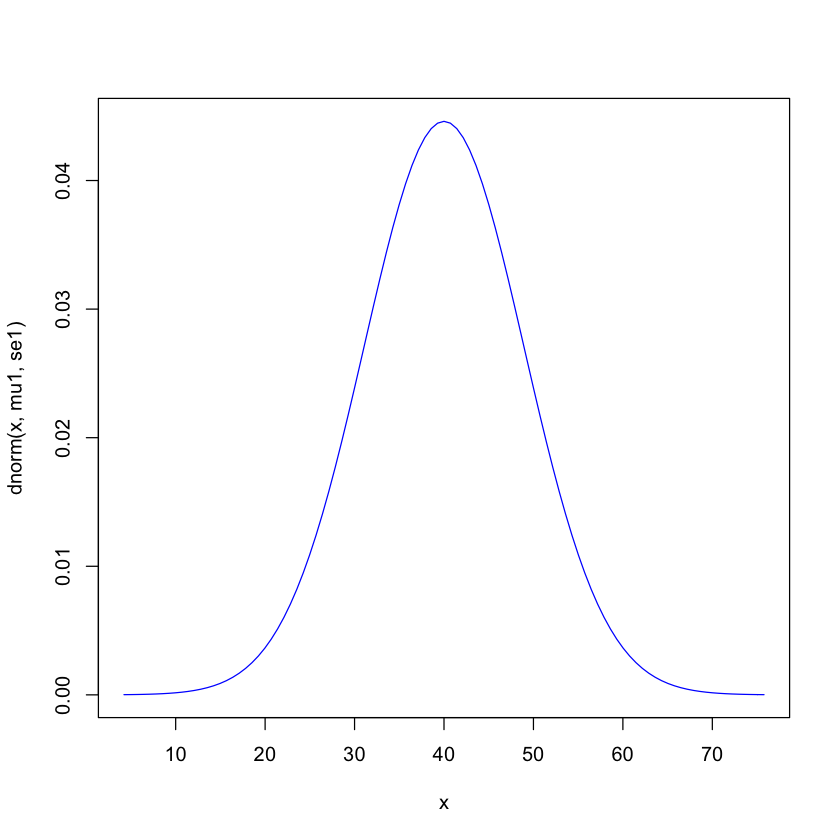

In [5]:
curve(dnorm(x,mu1,se1),from=mu1-4*se1, to=mu1+4*se1,col = "blue")

It would be great if we can overlay the plots to compare them on the same graph. Luckily there's a really easy way to do this in R. 

To overlay the 2 pdfs, first call the curve() command you did in Exercise 2, as well as all the plot details from Exercise 3. 

For the next command, use your answer from Exercise 5 but add the argument 'add=TRUE'. This will add the plot to an already existing plot.

While we are at it, lets add some details to our 2nd pdf. Shade your Type II error region using the commands seq, dnorm and polygon, as we did before with your variables for the 2nd pdf. 

Finally, add some labels. Do this with:
```
text("type I error", x=34, y=0.005) 
text("type II error", x=16, y=0.005)
```


<span class="girk">**EXERCISE 6:**</span> Overlay the 2 pdfs, include both Type 1 and 2 error regions. 

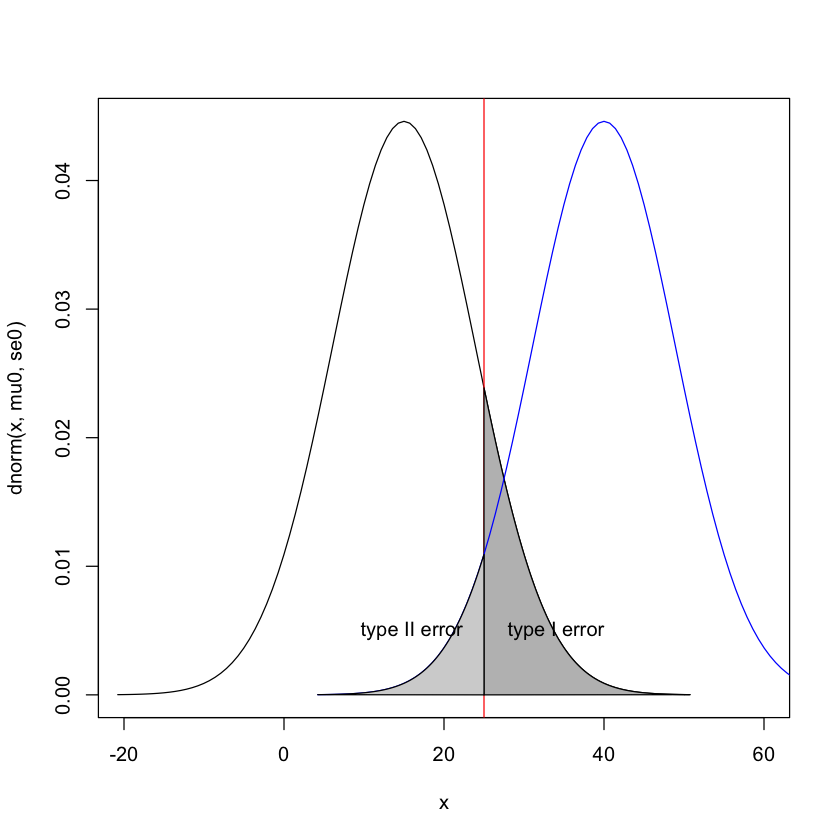

In [6]:
#First pdf from Exercise 2&3
curve(dnorm(x,mu0,se0),from=mu0-4*se0, to=mu0+4*se0, xlim=c(-20,60))
abline(v=25, col="red")
x=seq(from=xcrit, to=mu0+4*se0, by=0.1)
y=dnorm(x, mu0, se0)
polygon(c(25,x), c(0,y), col="grey")


#Now overlay 2nd pdf
curve(dnorm(x,mu1,se1),from=mu1-4*se1, to=mu1+4*se1, col="blue", add=TRUE)
x=seq(from=mu1-4*se1, to=xcrit, by=0.01)
y=dnorm(x,mu1,se1)
polygon(c(x,25), c(y,0), col="lightgrey")
text("type I error", x=34, y=0.005)
text("type II error", x=16, y=0.005)

<span class="girk">**EXERCISE 7:**</span> How do the Type I and II error rates change with increasing sample size? To determine this, find your new $\alpha$ and then repeat the plotting steps of Exercises 2-6. Compare the two figures and describe how the Type I and Type II error rates change with increasing sample size.


[1] 0.08545176

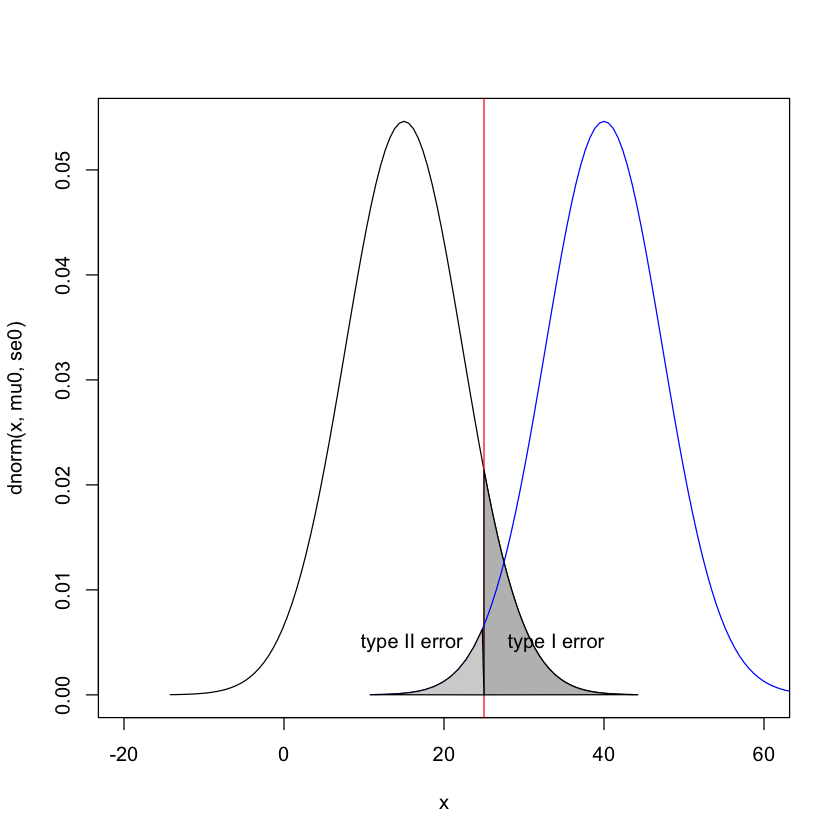

In [7]:
n=30
mu0=15
se0=40/sqrt(n)
xcrit=25
1-pnorm((xcrit-mu0)/(se0)) #=0.08545176. This is alpha.
curve(dnorm(x,mu0,se0),from=mu0-4*se0, to=mu0+4*se0, xlim=c(-20,60))
abline(v=25, col="red")
x=seq(from=xcrit, to=mu0+4*se0, by=0.1)
y=dnorm(x, mu0, se0)
polygon(c(25,x), c(0,y), col="grey")
mu1=40
se1=40/sqrt(n)
curve(dnorm(x,mu1,se1),from=mu1-4*se1, to=mu1+4*se1, col="blue", add=TRUE)
x=seq(mu1-4*se1, 25)
y=dnorm(x,mu1,se1)
polygon(c(x,25), c(y,0), col="lightgrey")
text("type I error", x=34, y=0.005)
text("type II error", x=16, y=0.005)
#Comparing the new figure with the previous one, 
#we find that the grey region has shrunk in area.
#So the Type I error rate has gone down from before.
#Similarly, the light grey region has also shrunk in area.
#So the Type II error rate has also gone down compared to before.
#Thus both Type I and Type II error rates decreased with increased sample size.